### AIDI 1002 - AI Algorithms - Final Project

### Sentiment Analysis

Michael Molnar - Durham College #100806823

## Notebook 3:  Model Preparation, Testing, and Analysis

#### Problem Statement:

How can we use machine learning to automatically extract the sentiment of every review, comment, blog post, or news article that mentions your business or your products?  

This project will create a model that will automatically analyze text and predict its sentiment - negative, neutral, or positive.  This solution will allow a business to automatically parse reviews and comments it receives, sorting them, and allowing for the analyis of how customers feel about the business and brand.  This analysis will allow for a company to determine how feelings towards the company change over time, or after the release of a new product or a shift in direction.  Unhappy customers can be automatically identified and prioritized.  

The proposed solution will be a classification model trained on real product reviews to identify the key words and phrases that most accurately predict the sentiment of a sample of text.

#### Focus of Notebook 3:

In this notebook I will focus on algorithm testing.  I will first split the cleaned data into training and testing.  Then, I will downsample the majority class to evenly distribute the targets in the training data.  

Next I will chose an evaluation metric.  This will be a multiclass classification problem with evenly distributed classes, and so I will use accuracy score and f1 score.  I will use Count Vectorizer to transform the text into a useable form for the algorithms.  I will test using unigrams (words), bigrams (two word combinations), and the combination of the two.  

I will test the following classifcation algorithms:
- Decision Tree
- Random Forest
- Logistic Regression 
- Support Vector Machines 
- Naive Bayes
- k-Nearest Neighbors 

From there I will tune the most successful algorithms and select the one I will use for my final model.

### Import the Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import SnowballStemmer

### Loading the Cleaned Data

In [2]:
clean_df = pd.read_csv('clean_review_text.csv')

In [3]:
clean_df.shape

(493265, 3)

In [4]:
clean_df.head()

,Unnamed: 0,reviewText,sentiment
0,0,contains interesting stitches,positive
1,1,fairly experienced knitter onecolor color bloc...,positive
2,2,great book index terrible write high light cro...,positive
3,3,purchased kindle edition incredibly handy part...,positive
4,4,very well laid very easy read book also nice s...,positive


In [6]:
clean_df.drop(columns=['Unnamed: 0'])

,reviewText,sentiment
0,contains interesting stitches,positive
1,fairly experienced knitter onecolor color bloc...,positive
2,great book index terrible write high light cro...,positive
3,purchased kindle edition incredibly handy part...,positive
4,very well laid very easy read book also nice s...,positive
...,...,...
493260,not love price watercolor pens not messy score,positive
493261,lots color markers,positive
493262,really fun use love watercolor not know made w...,positive
493263,box says vibrant colors only pencils actually ...,negative


Save the text into X and the sentiment, the targets, into y

In [7]:
X = clean_df['reviewText']
y = clean_df['sentiment']

In [8]:
# Check the shape 
X.shape

(493265,)

In [9]:
# Check the shape 
y.shape

(493265,)

### Split into Training and Testing Data

After the split I will be heavily downsampling the positive class within the training dataset.  For this reason I am making the training set very small here.  The result will be that the training/testing split will be close to 80/20 once I resample the training data.

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.05, random_state=0)

In [11]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (468601,)
Shape of X_test:  (24664,)
Shape of y_train:  (468601,)
Shape of y_test:  (24664,)


### Examining the Training Data

In [12]:
# Convert into a dataframe
X_train = pd.DataFrame(X_train)

In [13]:
# Append the labels back onto the dataframe
X_train['label'] = y_train

In [14]:
X_train

,reviewText,label
240017,good,positive
198869,loved much gave away lol pretty mess experimen...,positive
385992,good,positive
410577,great colors dual tip get very small places co...,positive
460059,wanted great,positive
...,...,...
439107,very good product easy use,positive
117952,good quality easy use spoon,positive
435829,thanks,positive
305711,best scissors cut appliqu pieces very comforta...,positive


In [15]:
# Create three subsets of the dataframe according to the three targets
positives = X_train[X_train['label']=='positive']
neutrals = X_train[X_train['label']=='neutral']
negatives = X_train[X_train['label']=='negative']

In [16]:
# Get the lengths of these 
print("Positive reviews:", len(positives))
print("Neutral reviews:", len(neutrals))
print("Negative reviews:", len(negatives))

Positive reviews: 415680
Neutral reviews: 27164
Negative reviews: 25757


### Downsampling the Majority Classes

I will make use of Scikit Learn's resample in order to balance the classes in the training data.  I will downsample both the positive and neutral sets so that the counts will correspond with that of the negative class. 

In [17]:
# Downsample the positive class without replacement 
pos_downsampled = resample(positives,
                          replace=False,
                          n_samples = len(negatives),
                          random_state=0)

In [18]:
# Downsample the neutral class without replacement 
neu_downsampled = resample(neutrals,
                          replace=False,
                          n_samples = len(negatives),
                          random_state=0)

In [19]:
# Combine the negative class and these two new classes into X_train
X_train = pd.concat([pos_downsampled, neu_downsampled, negatives])

In [20]:
# Check the label counts
X_train['label'].value_counts()

positive    25757
negative    25757
neutral     25757
Name: label, dtype: int64

In [21]:
X_train

,reviewText,label
392906,daughter loved set,positive
313050,really like using stencil texture effects pain...,positive
172906,love mat translucent able use much art project...,positive
342687,nice texture,positive
371334,very good,positive
...,...,...
100796,horrible smear constantly even not move paper ...,negative
268665,dont let cotton yarn slide,negative
237824,daughter wanted nylon cord making bracelets no...,negative
211543,not work top mount bobbin even though cut arou...,negative


In [22]:
# Get the size of the testing dataset 
X_test.shape

(24664,)

We see that now the training dataset is about three times that of the testing - or about a 75-25 split after the downsampling.

In [23]:
# Make y_train the labels and X_train the text once again
y_train = X_train['label']
X_train = X_train.drop(columns=['label'])
X_train = X_train['reviewText']

### Choosing an Evaluation Metric

As mentioned, this is a multiclass classification problem now with an even distribution of labels.  For this reason I will use accuracy score (the percentage of labels corectly predicted).  

### Explaining Count Vectorizer

I will use the Count Vectorizer to transform the text data into a useable form.  This is fit on the training data and creates a sparse matrix.  The columns of the matrix are the individual unique words that appear in the training dataset.  The rows correspond to the rows of the training data.  Each entry is the number of times that word appears in that row.  Using the Count Vectorizer allows me to do this model testing by unigrams, bigrams, a combination of these, or any other number of lenghts.  

In [25]:
# Create a Count Vectorizer object
vectorizer = CountVectorizer()

# Fit on the training data and transform the training and testing data
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [26]:
# Print vocabulary length (the number of unique words in the training data)
print('Vocabulary length:', len(vectorizer.get_feature_names()))

Vocabulary length: 39376


In [27]:
# Examine the matrix 
X_train_cv

<77271x39376 sparse matrix of type '<class 'numpy.int64'>'
	with 1405133 stored elements in Compressed Sparse Row format>

There are 77,271 rows in the training data and 39,376 unique words.  

### Testing Classification Algorithms

As mentioned in the introduction I will be testing six models for this classification problem.  These are Decision Trees, Random Forest, Logistic Regression, Support Vector Machines, Naive Bayes, and k-Nearest Neighbours.

### Approach 1:  Unigrams

I will fit the six models using the just created Count Vectorizer.

#### Decision Trees

In [28]:
# Fit a decision tree classifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_cv, y_train)

DecisionTreeClassifier()

In [29]:
# Predict the labels for the training and testing data
dt_train_preds = dt.predict(X_train_cv)
dt_preds = dt.predict(X_test_cv)

In [30]:
# Calculate the accuracy scores 
dt_train_acc = accuracy_score(y_train, dt_train_preds)
dt_test_acc = accuracy_score(y_test, dt_preds)
print("Training Accuracy:", dt_train_acc)
print("Testing Accuracy:", dt_test_acc)

Training Accuracy: 0.9832278603874675
Testing Accuracy: 0.7268488485241648


#### Random Forest

In [31]:
# Fit a random forest classifer  
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train_cv, y_train)

# Predict the labels for training and testing data
rf_train_preds = rf.predict(X_train_cv)
rf_preds = rf.predict(X_test_cv)

In [34]:
# Calculate the accuracy scores
rf_train_acc = accuracy_score(y_train, rf_train_preds)
rf_test_acc = accuracy_score(y_test, rf_preds)
print("Training Accuracy:", rf_train_acc)
print("Testing Accuracy:", rf_test_acc)

Training Accuracy: 0.9832278603874675
Testing Accuracy: 0.7724213428478754


#### Logistic Regression

In [35]:
# Fit a logistic regression classifier 
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_cv, y_train) 

# Predict the labels for training and testing data 
lr_train_preds = lr.predict(X_train_cv)
lr_preds = lr.predict(X_test_cv)

# Calculate the accuracy scores 
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.808660428880175
Testing Accuracy: 0.832833279273435


C:\Users\mdjm0\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Support Vector Machines

In [36]:
# Fit an SVC classifier 
svc = SVC()
svc.fit(X_train_cv, y_train) 

# Predict the labels for training and testing data 
svc_train_preds = svc.predict(X_train_cv)
svc_preds = svc.predict(X_test_cv)

# Calculate the accuracy scores 
svc_train_acc = accuracy_score(y_train, svc_train_preds)
svc_test_acc = accuracy_score(y_test, svc_preds)
print("Training Accuracy:", svc_train_acc)
print("Testing Accuracy:", svc_test_acc)

Training Accuracy: 0.8444176987485602
Testing Accuracy: 0.7990593577684074


#### Multinomial Naive Bayes

In [37]:
# Fit a Multinomial Naive Bayes classifier 
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

# Predict the labels for training and testing data
nb_train_preds = nb.predict(X_train_cv)
nb_preds = nb.predict(X_test_cv)

# Calculate the accuracy scores 
nb_train_acc = accuracy_score(y_train, nb_train_preds)
nb_test_acc = accuracy_score(y_test, nb_preds)
print("Training Accuracy:", nb_train_acc)
print("Testing Accuracy:", nb_test_acc)

Training Accuracy: 0.7599099273983771
Testing Accuracy: 0.7819493999351281


#### K-Nearest Neighbours

In [38]:
# Fit a KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_cv, y_train)

# Predict the labels for training and testing data
knn_train_preds = knn.predict(X_train_cv)
knn_preds = knn.predict(X_test_cv)

# Calculate the accuracy scores 
knn_train_acc = accuracy_score(y_train, knn_train_preds)
knn_test_acc = accuracy_score(y_test, knn_preds)
print("Training Accuracy:", knn_train_acc)
print("Testing Accuracy:", knn_test_acc)

Training Accuracy: 0.7398765384167411
Testing Accuracy: 0.8005595199481025


In [39]:
# Compile the training and testing accuracies
train_acc = {'DT': dt_train_acc, 'RF': rf_train_acc, 'LR': lr_train_acc, 'SVC': svc_train_acc, 
             'NB': nb_train_acc, 'KNN': knn_train_acc}
test_acc = {'DT': dt_test_acc, 'RF': rf_test_acc, 'LR': lr_test_acc, 'SVC': svc_test_acc, 
            'NB': nb_test_acc, 'KNN': knn_test_acc}

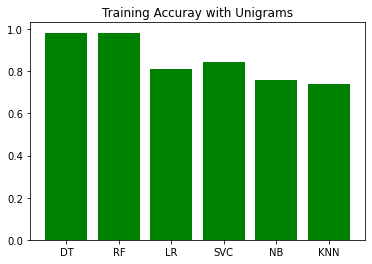

In [43]:
# Plot the training accuracies for each classifier 
plt.bar(train_acc.keys(), train_acc.values(), color='g')
plt.title("Training Accuray with Unigrams")
plt.show()

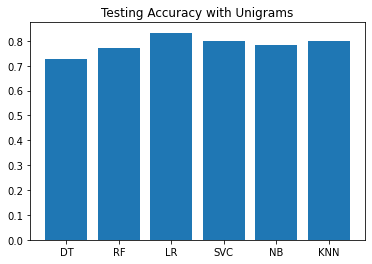

In [42]:
# Plot the testing accuracies for each classifier 
plt.bar(test_acc.keys(), test_acc.values())
plt.title("Testing Accuracy with Unigrams")
plt.show()

All six models are between 70% and 80% accuracy on the testing data.  Decision Tree and Random Forest perform the best on the training data.  Decision Tree and SVC take significantly longer than the others.  Logistic Regression seems like the best bet in terms of accuracy and speed for now.

### Approach 2: Bigrams

I will now re-vectorize the data, this time using bigrams.  I will check the new size of the vocabulary and then fit each of the same six models, checking their accuracies.  

In [44]:
# Create the count vectorizer using bigrams
vectorizer = CountVectorizer(ngram_range=(2,2))

# Vectorization
X_train_bcv = vectorizer.fit_transform(X_train)
X_test_bcv = vectorizer.transform(X_test)

In [45]:
# Get the number of unique bigrams
print('Vocabulary length:', len(vectorizer.get_feature_names()))

Vocabulary length: 681378


In [46]:
X_train_bcv

<77271x681378 sparse matrix of type '<class 'numpy.int64'>'
	with 1545737 stored elements in Compressed Sparse Row format>

There are 681,378 bigrams in the 77,271 rows of the training dataset.  

In [47]:
# Create a list of the six models
models = []

models.append(('dt', DecisionTreeClassifier()))
models.append(('rf', RandomForestClassifier()))
models.append(('lr', LogisticRegression()))
models.append(('svc', SVC()))
models.append(('nb', MultinomialNB()))
models.append(('knn', KNeighborsClassifier()))

In [48]:
# Fit each of the six models and make the predictions and check the accuracies
# Create a list of the scores for plotting
names = []
scores = []

for name, model in models:
    model.fit(X_train_bcv, y_train)
    y_pred = model.predict(X_test_bcv)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

model_scores = pd.DataFrame({'Name': names, 'Score': scores})
print(model_scores)

C:\Users\mdjm0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0   dt  0.791275
1   rf  0.824643
2   lr  0.843416
3  svc  0.834293
4   nb  0.656828
5  knn  0.773678


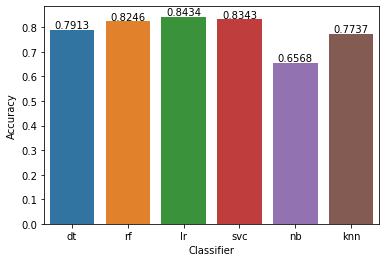

In [49]:
# Plot the accuracies
axis = sns.barplot(x = 'Name', y = 'Score', data = model_scores)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Logistic Regression has performed the best once again and shows a slight improvement after using the bigrams as opposed to the unigrams.  Random Forest and SVC also perform quite well.  

From this point on I will focus my efforts on Logistic Regression.  Logistic Regression has performed the most accurately so far and was much faster than Random Forest and Support Vector Machines.  To see if I can improve the model I will apply stemming to the text.  This transforms words into roots and will simply the dataset.  After that I will test Logistic Regression once again on bigrams, and then I will use a combination of unigrams and bigrams. 

### Approach 3:  Adding Stemming

I will make use of NLTK's Snowball Stemmer for this.  Stemming will convert plurals to their singulars and generally reduce all words into shorter forms.

(https://www.nltk.org/howto/stem.html)

In [50]:
def stem_text(input):
    # Create a stemmer object
    stemmer = SnowballStemmer('english')
    
    #Split the text and use the stemmer on each word 
    text = input.split()
    words = ""
    for i in text:
        words += (stemmer.stem(i))+' '
    
    # Return the recombined text
    return words 

In [54]:
# Print a review to test
clean_df['reviewText'][0]

'contains interesting stitches'

In [55]:
# See the result after stemming
stem_text(clean_df['reviewText'][0])

'contain interest stitch '

In [56]:
# Use the stem_text function on the training data 
X_train2 = X_train.apply(stem_text)

In [57]:
# Use the stem_text function on the testing data
X_test2 = X_test.apply(stem_text)

#### Logistic Regression with Bigrams and Stemming

In [58]:
vectorizer = CountVectorizer(ngram_range=(2,2))

# Vectorization
X_train_bcv2 = vectorizer.fit_transform(X_train2)
X_test_bcv2 = vectorizer.transform(X_test2)

In [59]:
# Fit a logistic regression classifier 
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_bcv2, y_train) 

# Predict the labels for training and testing data 
lr_train_preds = lr.predict(X_train_bcv2)
lr_preds = lr.predict(X_test_bcv2)

# Calculate the accuracy scores 
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.9498000543541562
Testing Accuracy: 0.8508757703535518


Stemming improves the test accuracy from about 84% to 85%.  Next I will fit a Count Vectorizer that will use both unigrams and bigrams.

### Approach 4:  Unigrams and Bigrams with Stemming

In [60]:
vectorizer = CountVectorizer(ngram_range=(1,2))

# Vectorization
X_train_bcv3 = vectorizer.fit_transform(X_train2)
X_test_bcv3 = vectorizer.transform(X_test2)

In [61]:
# Get the length of the vocabulary
print('Vocabulary length:', len(vectorizer.get_feature_names()))

Vocabulary length: 584152


In [62]:
X_train_bcv2

<77271x554885 sparse matrix of type '<class 'numpy.int64'>'
	with 1540296 stored elements in Compressed Sparse Row format>

There are a total of 554,885 unique unigrams and bigrams after the stemming process. 

In [63]:
# Fit a logistic regression classifier 
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_bcv3, y_train) 

# Predict the labels for training and testing data 
lr_train_preds = lr.predict(X_train_bcv3)
lr_preds = lr.predict(X_test_bcv3)

# Calculate the accuracy scores 
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.9635309495153421
Testing Accuracy: 0.8577278624716186


Once again the accuracy is slightly improved.

### Approach 5:  Unigrams, Bigrams and Trigrams with Stemming

In [64]:
vectorizer = CountVectorizer(ngram_range=(1,3))

# Vectorization
X_train_bcv4 = vectorizer.fit_transform(X_train2)
X_test_bcv4 = vectorizer.transform(X_test2)

In [72]:
print('Vocabulary length:', len(vectorizer.get_feature_names()))

Vocabulary length: 1753074


Using this approach we now have a much larger vocabulary - 1,753,074 unique entries.

In [65]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_bcv4, y_train) 
lr_train_preds = lr.predict(X_train_bcv4)
lr_preds = lr.predict(X_test_bcv4)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.974078244101927
Testing Accuracy: 0.8607281868310087


Once again the accuracy for training and testing are both slightly imporved.  I will continue with this model and see if I can improve the accuracy through hyperparameter tuning.

### Hyperparameter Tuning

#### Liblinear Solver and One vs Rest 

For a multiclass problem such as this, the One vs Rest fits a binary classifier to each of the three labels.

In [66]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train_bcv4, y_train) 
lr_train_preds = lr.predict(X_train_bcv4)
lr_preds = lr.predict(X_test_bcv4)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.974078244101927
Testing Accuracy: 0.8607281868310087


#### Newton-CG Solver and Multinomial 

The multinomial parameter minimizes the multinomial loss across all data.

In [68]:
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')
lr.fit(X_train_bcv4, y_train) 
lr_train_preds = lr.predict(X_train_bcv4)
lr_preds = lr.predict(X_test_bcv4)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.9778312691695461
Testing Accuracy: 0.8516866688290626


#### Newton-CG Solver and One vs Rest

In [69]:
lr = LogisticRegression(solver='newton-cg', multi_class='ovr')
lr.fit(X_train_bcv2, y_train) 
lr_train_preds = lr.predict(X_train_bcv2)
lr_preds = lr.predict(X_test_bcv2)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.9498000543541562
Testing Accuracy: 0.8508757703535518


#### Lowering the C-value 

A lowered C-value (the default is 1) increases regularization and reduces overfitting on the training data.

In [70]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr', C = 0.50)
lr.fit(X_train_bcv2, y_train) 
lr_train_preds = lr.predict(X_train_bcv2)
lr_preds = lr.predict(X_test_bcv2)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.932031421878842
Testing Accuracy: 0.8542409990269219


In [71]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr', C = 0.1)
lr.fit(X_train_bcv2, y_train) 
lr_train_preds = lr.predict(X_train_bcv2)
lr_preds = lr.predict(X_test_bcv2)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.8560261935266789
Testing Accuracy: 0.8589847551086603


The best result obtained is with the liblinear solver and the One vs Rest multiclass parameter.  This will be the model used in the next notebook to extract labels for new text.

### Examining the Logistic Regression Model

In [73]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train_bcv4, y_train) 
lr_train_preds = lr.predict(X_train_bcv4)
lr_preds = lr.predict(X_test_bcv4)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_preds)
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

Training Accuracy: 0.974078244101927
Testing Accuracy: 0.8607281868310087


First, check the classification report to see how the model is performing on each of the three classes.

In [75]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

    negative       0.54      0.79      0.64      1373
     neutral       0.30      0.66      0.41      1440
    positive       0.99      0.88      0.93     21851

    accuracy                           0.86     24664
   macro avg       0.61      0.78      0.66     24664
weighted avg       0.92      0.86      0.88     24664



We see that the model performs the best on the positive class and worst on the neutral class.  Next I will examine the coefficients of the Logistic Regression model in order to generate a list of the most important words and phrases it has attributed to each of the classes.

In [88]:
# Making a checking a prediction
lr.predict(X_test_bcv4[0])

array(['positive'], dtype=object)

In [89]:
# Using Predict_proba to generate the probabilities attributed to each class label
confidence = lr.predict_proba(X_test_bcv4[0])
print('Confidence in Negative Label:', confidence[0][0])
print('Confidence in Neutral Label:', confidence[0][1])
print('Confidence in Positive Label:', confidence[0][2])

Confidence in Negative Label: 0.0004512520091981016
Confidence in Neutral Label: 0.024424583762959286
Confidence in Positive Label: 0.9751241642278425


In [91]:
# Getting the correct label
y_test.iloc[0]

'positive'

### Examining the Logistic Regression Coefficients

In [76]:
# The number of features
len(vectorizer.get_feature_names())

1753074

In [77]:
# The number of coefficients 
lr.coef_.shape

(3, 1753074)

In [78]:
# The classes 
lr.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

For each of the three classes I will extract the coefficients of the logistic regression model for each of the features in the vectorizer.  I will then sort the coefficients and print the five that have the highest values.

#### The Negative Class

In [81]:
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), lr.coef_[0])
    }

In [82]:
# Sort the created dictionary according to value and print the five largest
for most_important_negative in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:5]:
    print (most_important_negative)

('junk', 3.0726358223736043)
('useless', 2.7383975515160652)
('no good', 2.5882426497003044)
('horribl', 2.5234650915169516)
('terribl', 2.3688897595392047)


These are the most important negative phrases for the model, and these clearly represent a strongly negative sentiment.

#### The Neutral Class

In [83]:
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), lr.coef_[1])
    }

In [84]:
for most_important_neutral in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:5]:
    print (most_important_neutral)

('three star', 4.0288150141789885)
('okay', 2.350508982553373)
('ok', 2.1440595823248274)
('averag', 2.0967954420772332)
('not bad', 2.0171706545013692)


These are what you would expect out of a neutral sentiment.  "Average", "okay", "not bad", "three stars".  

#### The Positive Class

In [85]:
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), lr.coef_[2])
    }

In [86]:
for most_important_positive in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:5]:
    print (most_important_positive)

('awesom', 3.0363366564732814)
('perfect', 3.0031275090763097)
('love', 2.8913258130581916)
('excel', 2.8235221812581006)
('never disappoint', 2.524678366389776)


And finally for positive, these words and phrases summarize a high rating and a positive sentiment.  

### Saving the Split, Resampled, and Stemmed Data for the Model

In [92]:
X_train2.to_csv('clean_training_data.csv')

In [93]:
X_test2.to_csv('clean_testing_data.csv')

In [94]:
y_train.to_csv('training_labels.csv')

In [95]:
y_test.to_csv('testing_labels.csv')

### Next Steps:

The next notebook will build a pipeline to use all of the text cleaning functions to transform a user's English text into a form that is suitable for the model.  I will then use the model created here to generate the sentiment for the new text.  I will use this examination of the coefficients to produce a list of the most important words or phrases that model found in the input text in reaching its label determination. 